# 가설 검정
## 패키지 Import

In [1]:
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

## Scipy 패키지
 - 사이파이는 수치 해석 기능을 제공하는 파이썬 패키지
 - 확률분포 분석을 위한 기능 제공

## 검정 통계량
## 1. 모분산을 알고 있는 경우 모평균의 가설 검정 = Z 검정(단일표본)
 - Scipy패키지의 확률분포 클래스stats.norm() 사용
 - 사례) 사람의 평균  수명을 알아보기 위해 사망자 100명을 표보으로 추출하여 조사하였더니 평균 71.789년으로 나타났다.
모표준편차를 8.9년으로 가정할 때, 현재의 평균 수명은 70년보다 길다고 할수 있는가를 검정하라(유의수준 a=0.05)

### 1) 가설 설정
 - 귀무가설$$H_0:\mu=70년$$
 - 대립가설 $$H_1:\mu\gt70년$$
 - 유의수준 $$\alpha=0.05$$

### 2) 기각값(임계값)

In [14]:
# 기각값
z_95 = stats.norm.ppf(0.95)
print(z_95)

1.6448536269514722


### 3) 검정 통계량(z통계량)

In [15]:
# 변이 분석
n = 100
m_u = 70
m_sigma = 8.9
hysis_u = 71.789

# 검정 통계량 계산
z = (hysis_u - m_u) / (m_sigma / np.sqrt(n))
print(z)

# print(2 * stats.norm().sf(np.abs(z))) # 유의확률

2.0101123595505634


### 4) 분포도 작성 및 통계적 결론
- 임계값 0.25 < z 통계량 2.02, z통계량은 기각역에 속함

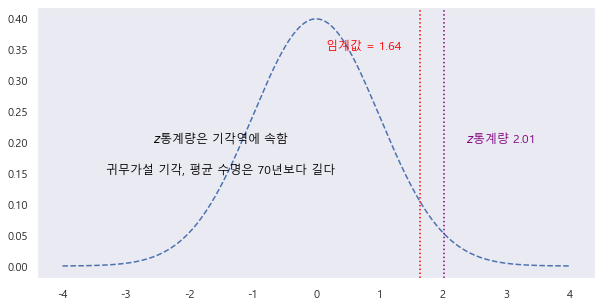

In [16]:
# 시각화
xx = np.linspace(-4, 4, 1000)
black = {"facecolor" : "black"}
plt.figure(figsize=(10, 5))

pdf_norm = stats.norm.pdf(xx)

plt.plot(xx, pdf_norm, 'b--')

# 95%의 임계값 표시
plt.axvline(x = z_95, color='red', linestyle=':')
plt.text(0.75, .35, '임계값 = ' + str(round(z_95, 2)),
        horizontalalignment = 'center', color = 'red')

# 위에서 구한 카이분포 통계값 = z통계량
plt.axvline(x=z, color = 'purple', linestyle=':')
plt.text(2.9, .2, '$z$통계량 ' + str(round(z, 2)),
        horizontalalignment = 'center', color = 'purple')
plt.text(-1.5, .2, '$z$통계량은 기각역에 속함 ',
        horizontalalignment = 'center', color = 'black')
plt.text(-1.5, .15, '귀무가설 기각, 평균 수명은 70년보다 길다',
        horizontalalignment = 'center', color = 'black')
plt.grid()
plt.show()

## 모분산을 모르고 n<30 경우 모평균의 가설 검정
 - Scipy패키지의 확률분포 클래스 stats.t() 사용
 - 사례) A편의점의 매운 라면의 연평균판매량 46개 였다고 한다. 12고ㅗㅅ의 매장을 표본추출하여 매운 라면의 판매량을 조사하였더니 표본평균이 42, 표본표준편차가 11.9로 나타났다. 라면 판매량의 모집단은 정규모집단으로 가정했을 때 연평균판매량이 46개보다 적은지 검정하라.(유의수준 a=0.05)
### 1) 가설 설정
 - 귀무가설 $$H_0:\mu=46$$
 - 대립가설 $$H_1:\mu>46년 (좌측 검정)$$
 - 유의수준 a=0.05

### 2) 기각값

In [17]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값, df : 자유도
t_95 = -1 * stats.t.ppf(0.95, df=n-1) # 좌측검점 * -1

print(t_95)

-1.7958848187036691


### 3) 검정 통계량(t통계량)

In [18]:
# 통계량 t값 계산
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print(t_value)

-1.1644039042479846


Font 'rm' does not have a glyph for '\u3145' [U+3145], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u3145' [U+3145], substituting with a dummy symbol.


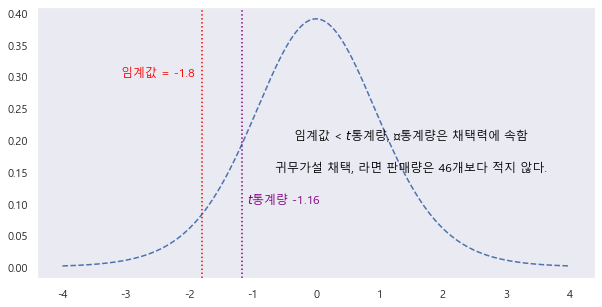

In [19]:
# 시각화
t_data = np.linspace(-4, 4, 1000)
t_dist = stats.t(df=n-1)

black = {"facecolor" : "black"}
plt.figure(figsize=(10, 5))

t_dist = stats.t(df=n-1)
plt.plot(t_data, t_dist.pdf(t_data), 'b--', label=("자유도(dof=%d)" % 11))

# 95%의 임계값 표시
plt.axvline(x = t_95, color='red', linestyle=':')
plt.text(-2.5, .3, '임계값 = ' + str(round(t_95, 2)),
        horizontalalignment = 'center', color = 'red')

# 위에서 구한 카이분포 통계값 = z통계량
plt.axvline(x=t_value, color = 'purple', linestyle=':')
plt.text(-0.5, .1, '$t$통계량 ' + str(round(t_value, 2)),
        horizontalalignment = 'center', color = 'purple')
plt.text(1.5, .2, '임계값 < $t$통계량, $ㅅ$통계량은 채택력에 속함 ',
        horizontalalignment = 'center', color = 'black')
plt.text(1.5, .15, '귀무가설 채택, 라면 판매량은 46개보다 적지 않다.',
        horizontalalignment = 'center', color = 'black')
plt.grid()
plt.show()

## p-value(유의확률 : significant probability)
 - 유의확률의 값은 확률밀도함수에서 표본값을 기준으로 만들어진 양측 꼬리(tail) 부분에 해당하는 영역의 면적
 - 귀무가설이 맞음에도 불구하고 현재 검정 통계량값과 같은 혹은 대립가설을 더 옹호하는 검정 통계량 값이 나올 확률
## 1. 모분산을  모르고 n<30 경우 모평균의 가설 검정의 사례 정리
 - 통계량 t = -1.1644039042479846
 - 95% 좌측검정 기각값 : -1.7958848187036691
 - 자유도 df : 12 - 1 

In [20]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값(유의수준 : 5%), df : 자유도
t_95 = round( -1 * stats.t.ppf(0.95, df = n-1), 3) # 좌측검정 * -1

print('기각값 :', t_95)

# 통계량 t값 계산
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print('t통계량 :', round(t_value, 3))

기각값 : -1.796
t통계량 : -1.164


In [21]:
# p_value(유의확률) 계산
round(stats.t(df=11).cdf(t_value), 3)

0.134

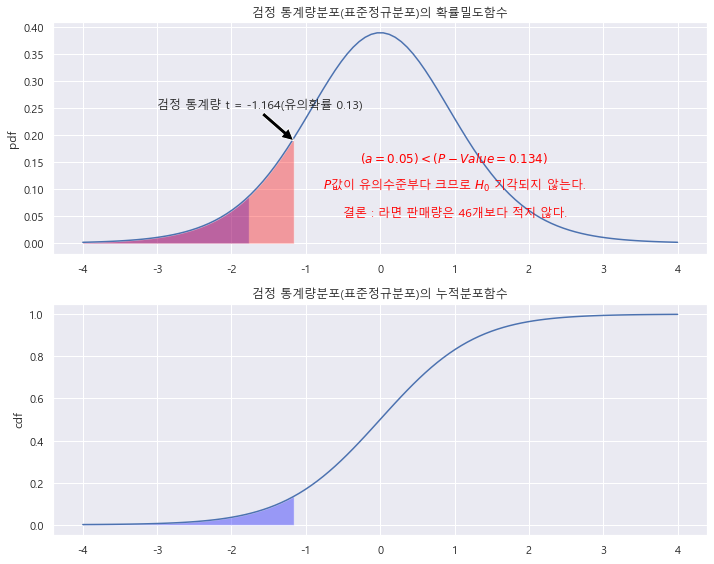

In [27]:
# 시각화
norm_rv = stats.t(df=11)

xx = np.linspace(-4, 4, 100)
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(xx, norm_rv.pdf(xx))
plt.ylabel('pdf')
plt.title('검정 통계량분포(표준정규분포)의 확률밀도함수')
black = {'facecolor' : 'black'}

# 기각값 면적
xx2 = np.linspace(-4, -1.769, 100)
plt.fill_between(xx2, norm_rv.pdf(xx2), facecolor='blue', alpha = 0.35)

# P-value(유의확률) test
plt.annotate('검정 통계량 t = -1.164(유의확률 0.13)', 
             xy=(-1.164, 0.19), 
             xytext=(-3, 0.25), 
             arrowprops = black)

# P-value(유의확률) 면적
xx3 = np.linspace(-4, -1.164, 100)
plt.fill_between(xx3, norm_rv.pdf(xx3), facecolor='red', alpha=0.35)

plt.text(1, .15, '$(a = 0.05) < (P-Value = 0.134)$',
        horizontalalignment='center', color='red')

plt.text(1, .10, '$P$값이 유의수준부다 크므로 $H_0$ 기각되지 않는다.',
        horizontalalignment='center', color='red')

plt.text(1, .05, '결론 : 라면 판매량은 46개보다 적지 않다.',
        horizontalalignment='center', color='red')

# 누적분포도
plt.subplot(212)
plt.plot(xx, norm_rv.cdf(xx))

plt.fill_between(xx3, norm_rv.cdf(xx3), facecolor='blue', alpha=0.35)
plt.ylabel('cdf')
plt.title('검정 통계량분포(표준정규분포)의 누적분포함수')

plt.tight_layout()
plt.show()